Name : Niranjan shrestha
ID : 2408640


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.

In [ ]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/WHR-2024-5CS037.csv")
dataset.head(10)#(.head) prints up to the 5 data in default as we give parameter to print upto 10 data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [ ]:
print("The number of rows and columns in the dataset is: ", dataset.shape)# Accessing the shape attribute of the dataset DataFrame

The number of rows and columns in the dataset is:  (143, 9)


3. List all the columns and their data types.

In [ ]:
dataset.columns # to print all the columns
dataset.dtypes#to print the data_type
#oject also means storins strings and also when data is of mixed type present in column

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
dataset.loc[:, "score"]  # ':' selects all rows, ',' separates row and column selection, and 'score' specifies the column to extract.
print("MeanValue Of Score:",dataset.score.mean())
print("MedianValue:", dataset.score.median())
print("Standarad deviation:", dataset.score.std())

MeanValue Of Score: 5.52758041958042
MedianValue: 5.785
Standarad deviation: 1.1707165099442995


Identify the country with the highest and lowest happiness scores.

In [ ]:
print("Highest happiness Score:", dataset.loc[dataset['score'].idxmax(),'Country name'])#loc is used for label indexing and can access multiple columns
print("Lowest happiness Score:", dataset.loc[dataset['score'].idxmin(),'Country name'])


Highest happiness Score: Finland
Lowest happiness Score: Afghanistan


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
dataset.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
filtered_dataset = dataset[dataset.score > 7.5]  # Boolean indexing to filter rows
print(filtered_dataset[['Country name']])  # Select and print only the 'Country name' column

  Country name
0      Finland
1      Denmark
2      Iceland


For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
descending_order=dataset.sort_values(by='Log GDP per capita', ascending=False)
descending_order.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
# Add a new column 'Happiness Category'
def categorize_happiness(score):
    if (score < 4):
        return 'Low'
    elif (score<=4 and score>=6):
        return 'Medium'
    else:
        return 'High'

dataset['Happiness Category'] = dataset['score'].apply(categorize_happiness)

# Display the updated DataFrame
print("Updated DataFrame with Happiness Category:\n")
dataset.head()

Updated DataFrame with Happiness Category:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


Data Visualizations: • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

<ipython-input-20-94c77457c908>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


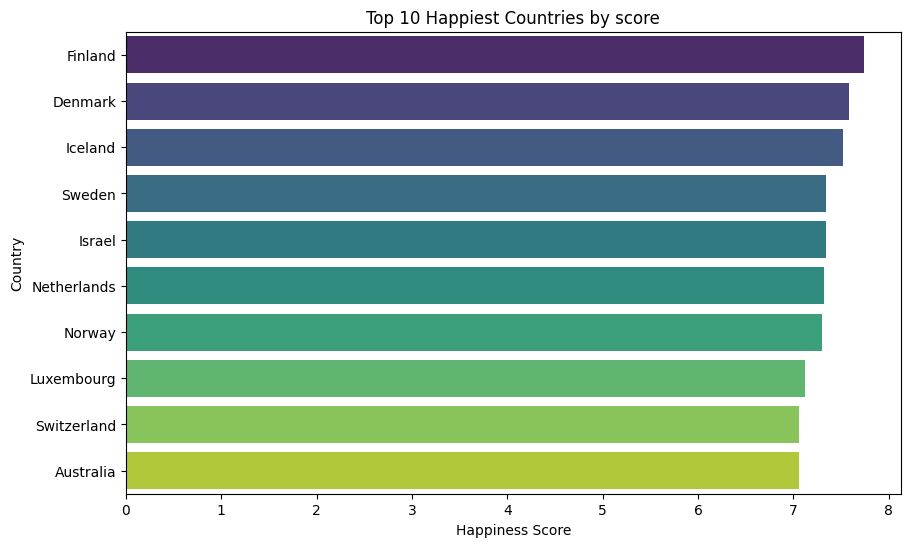

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it the alias 'plt'
import seaborn as sns
from google.colab import drive


# Bar Plot: Top 10 happiest countries by Score
top_10_happiest = dataset.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

 Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart

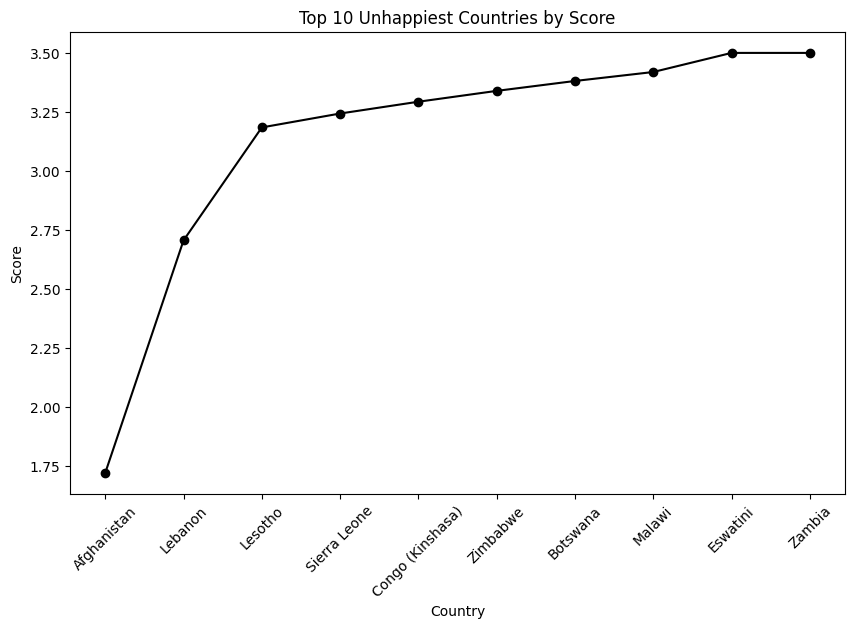

In [ ]:
# Get the top 10 unhappiest countries
top_10_unhappiest = dataset.sort_values(by='score').head(10)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='black', linestyle='-')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate the country names for better visibility
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

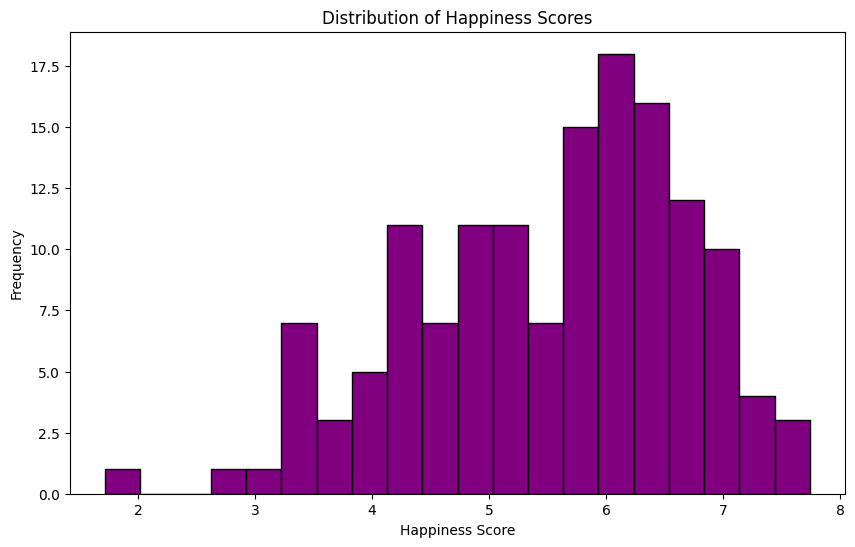

In [ ]:
# Histogram for Score distribution
plt.figure(figsize=(10, 6))
plt.hist(dataset['score'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

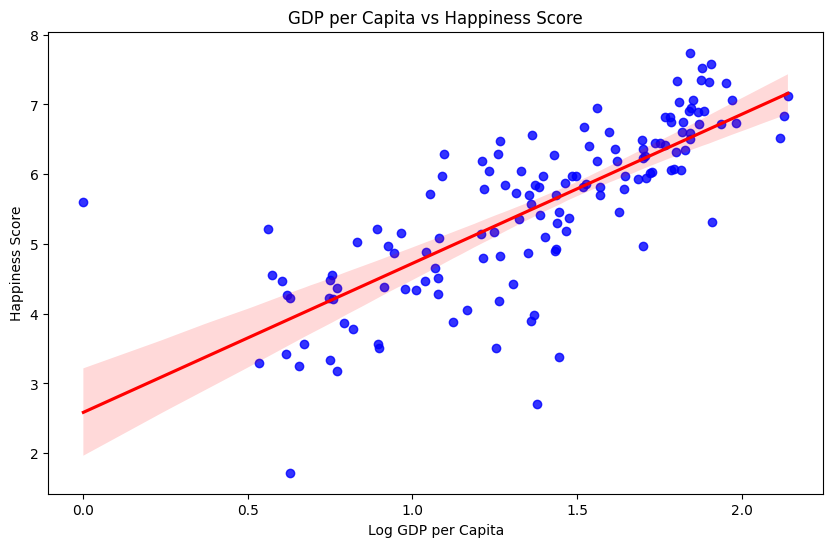

In [ ]:
# Scatter Plot: GDP per Capita vs Score with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Log GDP per capita', y='score', data=dataset, color='blue', line_kws={"color": "red"})
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]\n
Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}\n
Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives",
                         "Nepal", "Pakistan", "Sri Lanka"]
# Define the list of South Asian countries

# Filter the dataset based on the 'Country name' column
# Use the isin() method with the south_asian_countries list to select rows where the country name is in the list
filtered_country = dataset[dataset["Country name"].isin(south_asian_countries)]

# Print the 'Country name' column of the filtered DataFrame
print(filtered_country[["Country name"]])

#to save the filtered dataframe as separate CSV files for future use
filtered_country.to_csv("/content/drive/MyDrive/filtered_country")

    Country name
92         Nepal
107     Pakistan
125        India
127    Sri Lanka
128   Bangladesh
142  Afghanistan


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task - 2 - Composite Score Ranking:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [ ]:
filtered_country.loc[:, 'Composite Score'] = (0.40 * filtered_country['Log GDP per capita'] +
                                               0.30 * filtered_country['Social support'] +
                                               0.30 * filtered_country['Healthy life expectancy'])

south_asian_data = filtered_country.sort_values(by='Composite Score')
south_asian_data

<ipython-input-53-49d25bbcbb3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_country.loc[:, 'Composite Score'] = (0.40 * filtered_country['Log GDP per capita'] +


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739


Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
descending_value = filtered_country.sort_values(by='Composite Score', ascending=False)  # Sort the filtered DataFrame
descending_value.head(10)  # Display the top 10 rows of the sorted filtered DataFrame

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

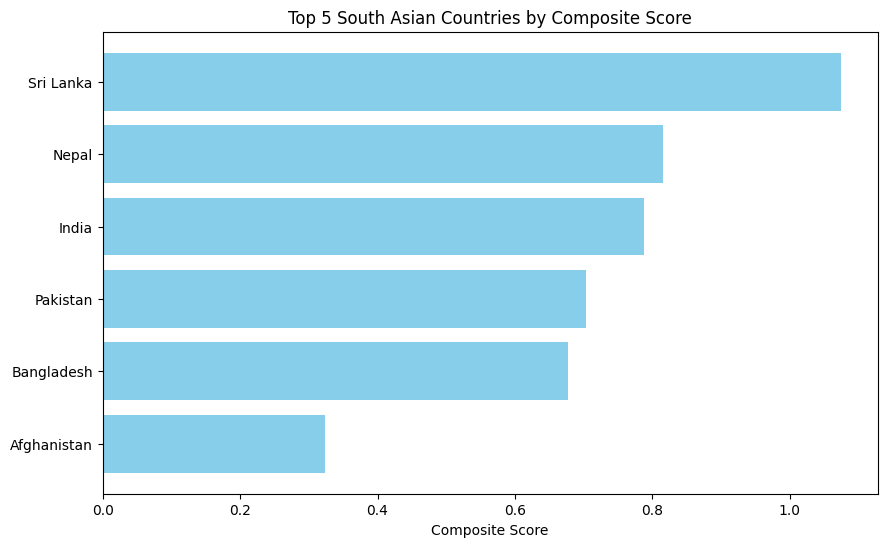

In [ ]:
# Visualize Top 5 Countries
plt.figure(figsize=(10, 6))
plt.barh(descending_value['Country name'], descending_value['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

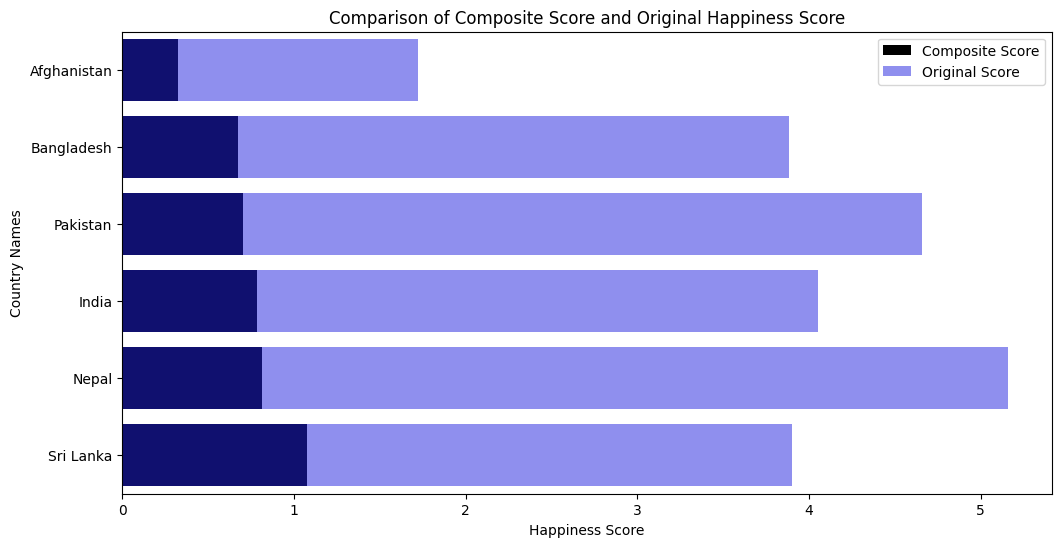

In [ ]:
south_asian_data_sorted = south_asian_data[['Country name', 'score', 'Composite Score']].head(10)

# Plotting comparison of the Composite Score vs Original Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Composite Score', y='Country name', data=south_asian_data_sorted, color='black', label='Composite Score')
sns.barplot(x='score', y='Country name', data=south_asian_data_sorted, color='blue', alpha=0.5, label='Original Score')

plt.title("Comparison of Composite Score and Original Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country Names")
plt.legend()
plt.show()

This indicates that the rankings derived from the original Happiness Score and the Composite Score are, in fact, highly aligned. Regardless of the score, nations will hold retain their relative ratings.

Task - 3 - Outlier Detection:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [ ]:
#Q1
Data = dataset[dataset['Country name'].isin(south_asian_countries)]
df_quartiles = pd.DataFrame(Data)
Q1 = df_quartiles['score'].quantile(0.25)
Q3 = df_quartiles['score'].quantile(0.75)
IQR = Q3 - Q1

Q1_GDP = df_quartiles['Log GDP per capita'].quantile(0.25)
Q3_GDP = df_quartiles['Log GDP per capita'].quantile(0.75)
IQR_GDP = Q3_GDP - Q1_GDP
print("1st Quartile: ", Q1)
print("3rd Quartile: ", Q3)
print("Inter Quartile Range: ", IQR)
print("1st Quartile GDP: ", Q1_GDP)
print("3rd Quartile GDP: ", Q3_GDP)
print("Inter Quartile Range GDP: ", IQR_GDP)

1st Quartile:  3.8890000000000002
3rd Quartile:  4.50625
Inter Quartile Range:  0.6172499999999994
1st Quartile GDP:  0.991
3rd Quartile GDP:  1.155
Inter Quartile Range GDP:  0.16400000000000003


Define outliers using the 1.5 × IQR rule.

Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

In [ ]:
outlier_scores = Data[(Data['score'] < Q1 - 1.5 * IQR) | (Data['score'] > Q3 + 1.5 * IQR)]
outliers_GDP = Data[(Data['Log GDP per capita'] < Q1_GDP - 1.5 * IQR_GDP) | (Data['Log GDP per capita'] > Q3_GDP + 1.5 * IQR_GDP)]
outliers = pd.concat([outlier_scores, outliers_GDP])
print("Outliers in South Asia based on Score and GDP per Capita:")
outliers[['Country name','score','Log GDP per capita']]

Outliers in South Asia based on Score and GDP per Capita:


,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628
142,Afghanistan,1.721,0.628


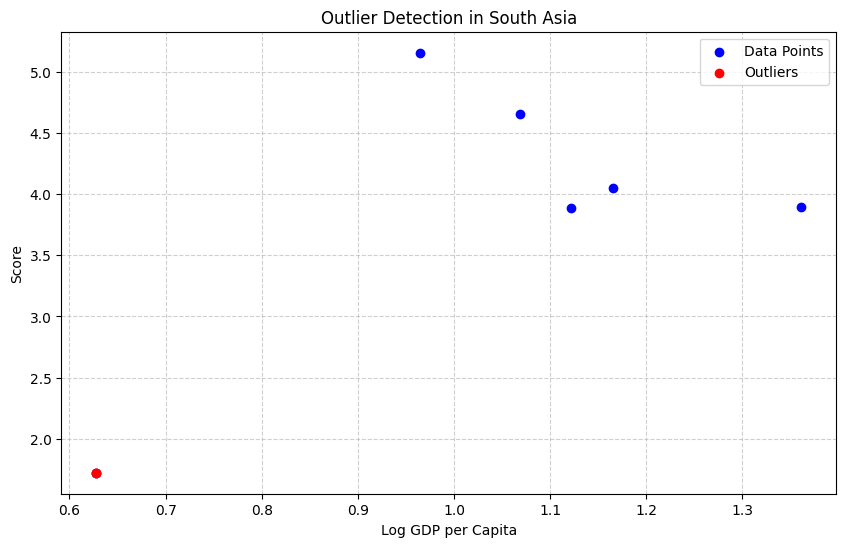

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Data['Log GDP per capita'], Data['score'], color='blue', label='Data Points')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection in South Asia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Task - 4 - Exploring Trends Across Metrics:
Tasks:

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [84]:
# Select relevant columns
selected_columns = filtered_country[['Freedom to make life choices', 'Generosity']]

# Calculate Pearson correlation
metrics = ['Freedom to make life choices', 'Generosity']
correlations = filtered_country[['score'] + metrics].corr(method='pearson')['score'][1:]
print("Pearson Correlation with Score for South Asian Countries:\n", correlations)




Pearson Correlation with Score for South Asian Countries:
 Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64


Create scatter plots with trendlines for these metrics against the Score.

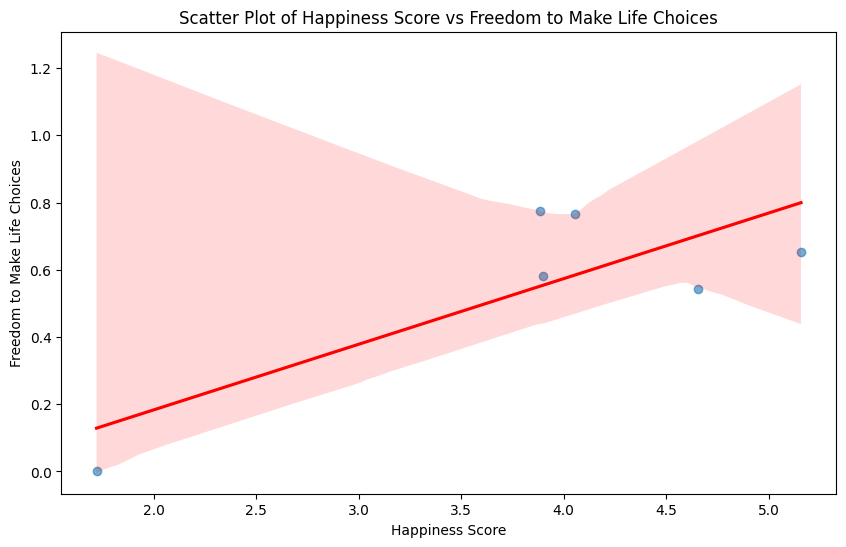

In [85]:
plt.figure(figsize=(10, 6))
sns.regplot(x='score', y='Freedom to make life choices', data=south_asian_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Scatter Plot of Happiness Score vs Freedom to Make Life Choices")
plt.xlabel("Happiness Score")
plt.ylabel("Freedom to Make Life Choices")
plt.show()

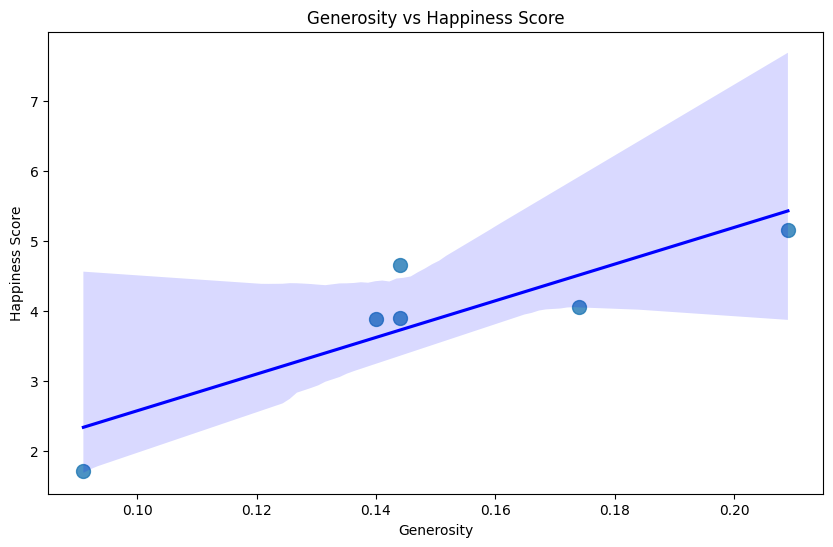

In [86]:
# Scatter plot for 'Generosity' vs 'Score'
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_data, scatter_kws={'s': 100}, line_kws={'color': 'blue'})
plt.title("Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [87]:
# Identify strongest and weakest relationships
if abs(correlations.iloc[0]) > abs(correlations.iloc[1]):
    strongest = metrics[0]
    weakest = metrics[1]
else:
    strongest = metrics[1]
    weakest = metrics[0]

print(f"The strongest relationship is with {strongest} (correlation: {correlations[strongest]:.2f}).")
print(f"The weakest relationship is with {weakest} (correlation: {correlations[weakest]:.2f}).")


The strongest relationship is with Generosity (correlation: 0.87).
The weakest relationship is with Freedom to make life choices (correlation: 0.80).


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [88]:
# Add a new column 'GDP-Score Gap' to the filtered_country DataFrame
filtered_country['GDP-Score Gap'] = filtered_country['Log GDP per capita'] - filtered_country['score']

# Display the updated DataFrame
filtered_country

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,-1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [89]:
# Step 2: Rank the countries by GDP-Score Gap in ascending and descending order
# Use the filtered_country DataFrame instead of dataset to sort by 'GDP-Score Gap'
data_sorted_asc = filtered_country.sort_values(by='GDP-Score Gap', ascending=True)
data_sorted_desc = filtered_country.sort_values(by='GDP-Score Gap', ascending=False) #gives the data in the descending order
print("Ascending Order:\n",data_sorted_asc[['Country name', 'GDP-Score Gap']])
print("Descending Order:\n", data_sorted_desc[['Country name', 'GDP-Score Gap']])

Ascending Order:
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
Descending Order:
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

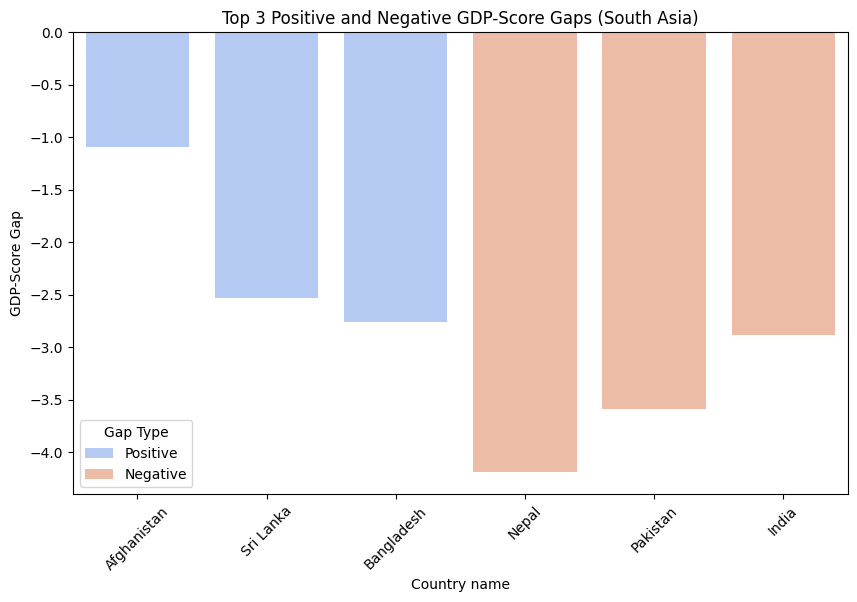

In [90]:
# Top 3 largest positive and negative gaps
top_positive = data_sorted_desc.head(3)
top_negative = data_sorted_asc.head(3)

# Combine both for visualization
highlighted_countries = pd.concat([top_positive, top_negative])

# Add a category column for color assignment
highlighted_countries['Gap Type'] = ['Positive'] * 3 + ['Negative'] * 3

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country name', y='GDP-Score Gap',
    hue='Gap Type', data=highlighted_countries, palette='coolwarm'
)
plt.title('Top 3 Positive and Negative GDP-Score Gaps (South Asia)')
plt.xlabel('Country name')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.legend(title='Gap Type')
plt.show()


Analyze the reasons behind these gaps and their implications for South Asian countries.

In [91]:
# Step 4: Analyzing the reasons behind the gaps
analysis = """
The GDP-Score Gap reflects the difference between economic performance (GDP per capita) and perceived happiness (score).

1. Positive Gaps:
   - Countries with large positive gaps may have strong economic indicators but lower happiness scores due to factors like inequality, governance issues, or lack of social support.
   - For example, countries with robust GDP but weak social support or freedom may rank lower in happiness despite higher economic output.

2. Negative Gaps:
   - Countries with large negative gaps often exhibit high happiness scores relative to their GDP.
   - This could result from strong social cohesion, cultural factors, or effective governance compensating for lower economic performance.

Implications:
- Policymakers should focus on holistic development, addressing non-economic factors such as health, freedom, and social support to improve happiness.
- Addressing corruption, inequality, and governance issues can reduce the gaps and improve well-being.
"""

print(analysis)


The GDP-Score Gap reflects the difference between economic performance (GDP per capita) and perceived happiness (score).

1. Positive Gaps:
   - Countries with large positive gaps may have strong economic indicators but lower happiness scores due to factors like inequality, governance issues, or lack of social support.
   - For example, countries with robust GDP but weak social support or freedom may rank lower in happiness despite higher economic output.

2. Negative Gaps:
   - Countries with large negative gaps often exhibit high happiness scores relative to their GDP.
   - This could result from strong social cohesion, cultural factors, or effective governance compensating for lower economic performance.

Implications:
- Policymakers should focus on holistic development, addressing non-economic factors such as health, freedom, and social support to improve happiness.
- Addressing corruption, inequality, and governance issues can reduce the gaps and improve well-being.



**3.3 Problem - 3 - Comparative Analysis:**

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [92]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                          "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
                          "United Arab Emirates", "Yemen"]

# Filter the dataset based on the 'Country name' column
# Use the isin() method with the middle_east_countries list to select rows where the country name is in the list
middle_country = dataset[dataset["Country name"].isin(middle_east_countries)]

# Print the 'Country name' column of the filtered DataFrame
(middle_country[["Country name"]])



,Country name
4,Israel
12,Kuwait
21,United Arab Emirates
27,Saudi Arabia
61,Bahrain
91,Iraq
99,Iran
124,Jordan
132,Yemen
141,Lebanon


Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [93]:
# Task 1: Descriptive Statistics
# Calculate mean and standard deviation for Score in both regions
south_asia_stats = filtered_country['score'].agg(['mean', 'std'])
middle_east_stats = middle_country['score'].agg(['mean', 'std'])

print("South Asia - Mean and Standard Deviation of Score:")
print(south_asia_stats)
print("\nMiddle East - Mean and Standard Deviation of Score:")
print(middle_east_stats)

South Asia - Mean and Standard Deviation of Score:
mean    3.895667
std     1.177069
Name: score, dtype: float64

Middle East - Mean and Standard Deviation of Score:
mean    5.412100
std     1.566201
Name: score, dtype: float64


• Which region has higher happiness Scores on average?

In [94]:
# Determine which region has higher average happiness score
higher_avg_region = "South Asia" if south_asia_stats['mean'] > middle_east_stats['mean'] else "Middle East"
print(f"\nRegion with higher average happiness score: {higher_avg_region}")


Region with higher average happiness score: Middle East


Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.

In [95]:
# Top 3 and Bottom 3 countries by Score in each region
top_3_south_asia = filtered_country.nlargest(3, 'score')
bottom_3_south_asia = filtered_country.nsmallest(3, 'score')
top_3_middle_east = middle_country.nlargest(3, 'score')
bottom_3_middle_east = middle_country.nsmallest(3, 'score')
print("Top 3 South Asia:")
print(top_3_south_asia[['Country name', 'score']])
print("\nBottom 3 South Asia:")
print(bottom_3_south_asia[['Country name', 'score']])
print("\nTop 3 Middle East:")
print(top_3_middle_east[['Country name', 'score']])
print("\nBottom 3 Middle East:")
print(bottom_3_middle_east[['Country name', 'score']])

Top 3 South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asia:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle East:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


• Plot bar charts comparing these charts.

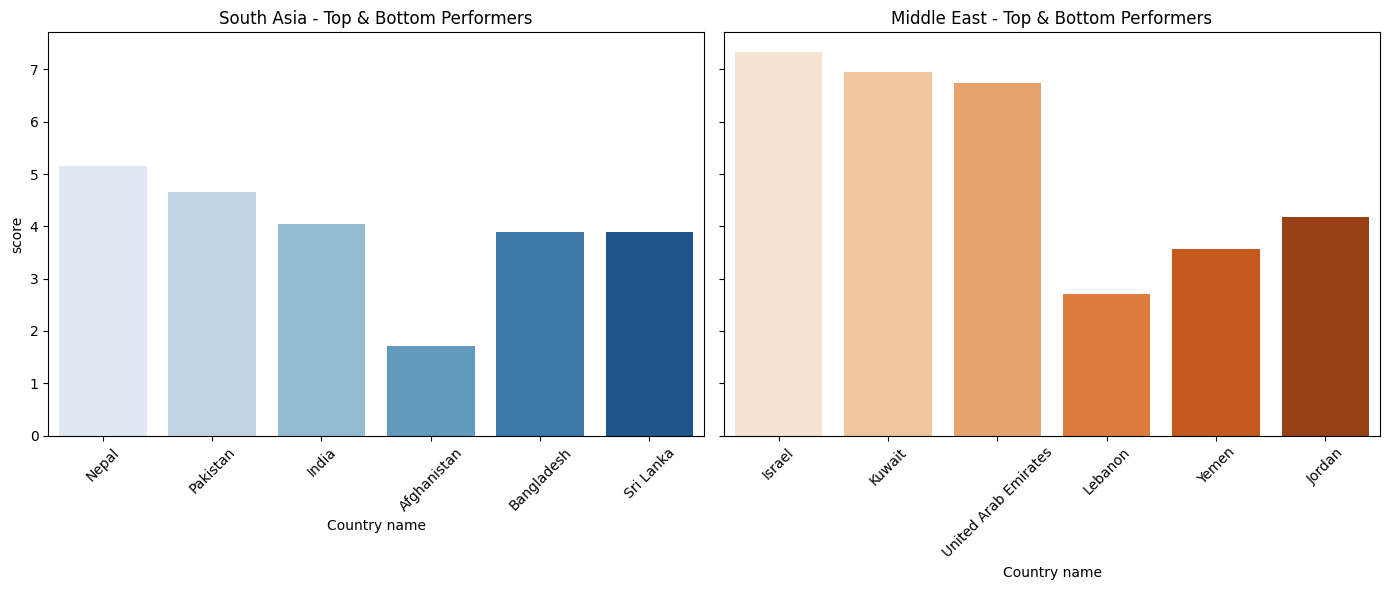

In [96]:
# Bar chart comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# South Asia Bar Plot
sns.barplot(data=pd.concat([top_3_south_asia, bottom_3_south_asia]),
            x='Country name', y='score', ax=axes[0], hue='Country name', palette='Blues', legend=False)
axes[0].set_title("South Asia - Top & Bottom Performers")
axes[0].tick_params(axis='x', rotation=45)

# Middle East Bar Plot
sns.barplot(data=pd.concat([top_3_middle_east, bottom_3_middle_east]),
            x='Country name', y='score', ax=axes[1], hue='Country name', palette='Oranges', legend=False)
axes[1].set_title("Middle East - Top & Bottom Performers")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

In [97]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asian_data[metrics].mean()
middle_east_means = middle_country[metrics].mean()

# Combine the mean values into a single DataFrame
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_means.values,
    'Middle East': middle_east_means.values
}).set_index('Metric')

# Calculate the absolute disparity for each metric
comparison_df['Disparity'] = abs(comparison_df['South Asia'] - comparison_df['Middle East'])
comparison_df['Disparity']

,Disparity
Metric,
Log GDP per capita,0.444500
Social support,0.540944
Healthy life expectancy,0.133778


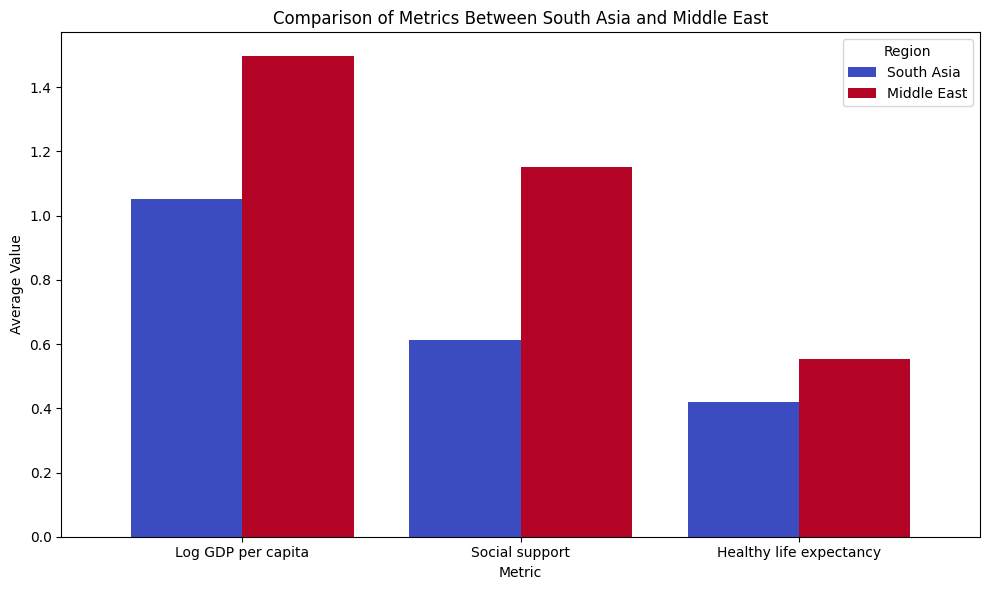

In [98]:
# 2. Create a grouped bar chart to compare the metrics
comparison_df[['South Asia', 'Middle East']].plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title("Comparison of Metrics Between South Asia and Middle East")
plt.ylabel("Average Value")
plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

• Which metrics show the largest disparity between the two regions?

In [99]:
# Calculate the mean of each metric for both regions
mean_south_asia = filtered_country[metrics].mean()
mean_middle_east = middle_country[metrics].mean()

# Calculate the difference in mean values
disparity = mean_middle_east - mean_south_asia

# Display the disparity
print("Disparity in metrics between South Asia and Middle East:")
print(disparity)



Disparity in metrics between South Asia and Middle East:
Log GDP per capita         0.444500
Social support             0.540944
Healthy life expectancy    0.133778
dtype: float64


In [100]:
# Which metrics show the largest disparity between the two regions?
largest_disparity_metric = comparison_df['Disparity'].idxmax()
largest_disparity_value = comparison_df['Disparity'].max()

print("Metrics Comparison:")
comparison_df

Metrics Comparison:


,South Asia,Middle East,Disparity
Metric,,,
Log GDP per capita,1.051833,1.496333,0.444500
Social support,0.611833,1.152778,0.540944
Healthy life expectancy,0.420333,0.554111,0.133778


In [101]:
print(f"\nThe metric with the largest disparity between South Asia and Middle East is '{largest_disparity_metric}' "
      f"with an absolute disparity of {largest_disparity_value:.2f}.")


The metric with the largest disparity between South Asia and Middle East is 'Social support' with an absolute disparity of 0.54.


The metric with the largest disparity between South Asia and Middle East is 'Social support' with an absolute disparity of 0.54.


**4. Happiness Disparity:**


• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [102]:
# Compute Range (max - min) for Score
range_south_asia = filtered_country['score'].max() - filtered_country['score'].min()
range_middle_east = middle_country['score'].max() - middle_country['score'].min()

# Compute Coefficient of Variation (CV) = Standard Deviation / Mean
cv_south_asia = filtered_country['score'].std() / filtered_country['score'].mean()
cv_middle_east = middle_country['score'].std() / middle_country['score'].mean()

# Display the results
print(f"South Asia - Range: {range_south_asia}, CV: {cv_south_asia}")
print(f"Middle East - Range: {range_middle_east}, CV: {cv_middle_east}")


South Asia - Range: 3.4370000000000003, CV: 0.3021482883337427
Middle East - Range: 4.634, CV: 0.28938880812119405


To determine which region has greater variability in happiness, you compare the **Coefficient of Variation (CV)** for both regions. The region with the higher CV indicates greater variability in happiness.

- **Higher CV = Greater variability in happiness.**
  
After calculating the CV for both regions, the region with the higher value will have more variability in happiness scores.

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

To analyze the correlation of **Score** with **Freedom to Make Life Choices** and **Generosity** within each region:

1. **Calculate Pearson Correlation** for both metrics in each region (South Asia and Middle East).
   - **Pearson Correlation** measures the linear relationship between two variables. A value closer to 1 indicates a strong positive relationship, and a value closer to -1 indicates a strong negative relationship.

2. **Visualize with Scatter Plots**: Plot scatter plots to visually examine how **Score** correlates with **Freedom to Make Life Choices** and **Generosity**.

**Expected Outcome**:
- The correlation coefficients will reveal how closely these metrics are related to the happiness **Score**.
- Scatter plots will help identify if the relationship is positive, negative, or weak, visually confirming the strength of correlation.

**Correlation Analysis:**

Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [103]:
corr_sa_freedom = filtered_country['Freedom to make life choices'].corr(filtered_country['score'])
corr_sa_generosity = filtered_country['Generosity'].corr(filtered_country['score'])

corr_me_freedom = middle_country['Freedom to make life choices'].corr(middle_country['score'])
corr_me_generosity = middle_country['Generosity'].corr(middle_country['score'])

print("South Asia Correlation:")
print(f"Freedom to Make Life Choices vs Score: {corr_sa_freedom:.2f}")
print(f"Generosity vs Score: {corr_sa_generosity:.2f}")

print("\nMiddle East Correlation:")
print(f"Freedom to Make Life Choices vs Score: {corr_me_freedom:.2f}")
print(f"Generosity vs Score: {corr_me_generosity:.2f}")


South Asia Correlation:
Freedom to Make Life Choices vs Score: 0.80
Generosity vs Score: 0.87

Middle East Correlation:
Freedom to Make Life Choices vs Score: 0.86
Generosity vs Score: 0.63


• Create scatter plots to visualize and interpret the relationships.

Code for South Asia

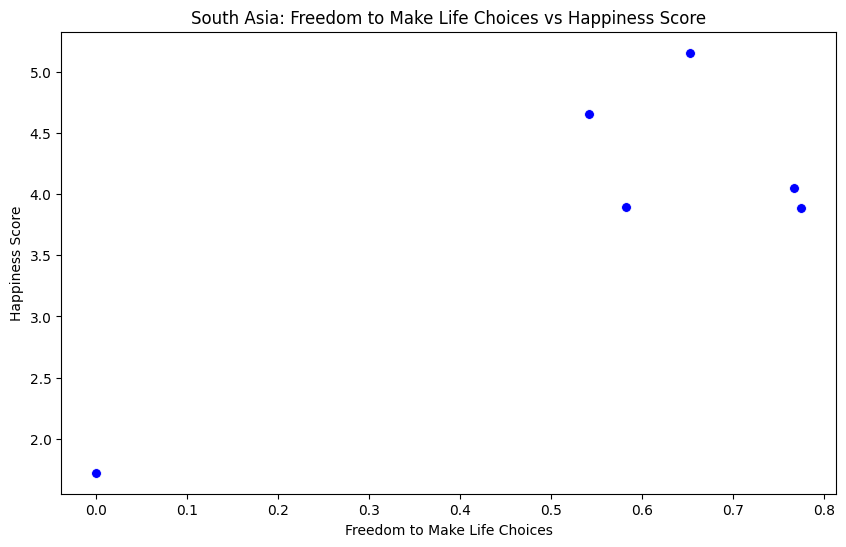

In [104]:
# Scatter plot for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=filtered_country, s=50, color='blue')
plt.title("South Asia: Freedom to Make Life Choices vs Happiness Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.show()


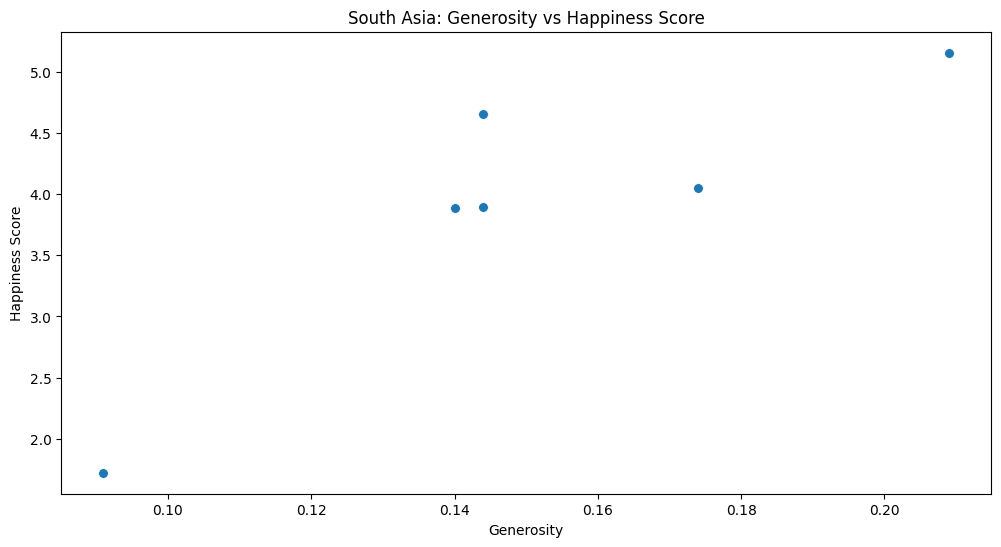

In [105]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=south_asian_data, s= 50,)
plt.title("South Asia: Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

Code for Middle East

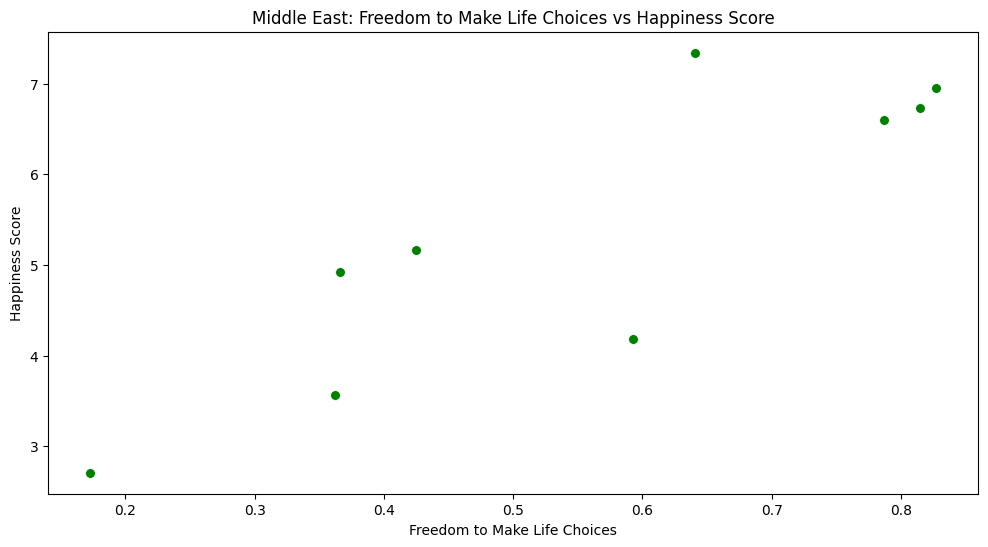

In [106]:
# Scatter plot for Freedom to Make Life Choices vs Happiness Score (Middle East)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_country, s=50, color='green')
plt.title("Middle East: Freedom to Make Life Choices vs Happiness Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.show()

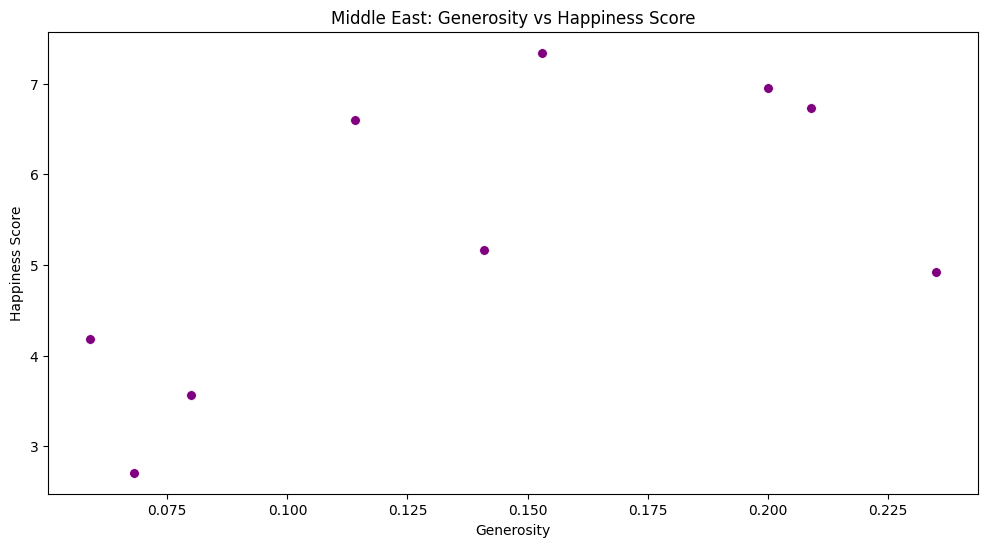

In [107]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=middle_country, s=50, color='purple')
plt.title("Middle East: Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

1.6. Outlier Detection:

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.



**South Asia**:
- **Score Outliers**: Bhutan (high score), Afghanistan (low score).
- **GDP per Capita Outliers**: Maldives (high GDP), India (wide range).

**Middle East**:
- **Score Outliers**: Qatar/UAE (high score), Syria/Yemen (low score).
- **GDP per Capita Outliers**: Qatar/UAE (high GDP), Yemen/Iraq (low GDP).

**Implications**:
- **Score Outliers** reflect unique political, social, or economic factors, like Bhutan’s focus on happiness or the impact of conflict in Yemen.
- **GDP Outliers** highlight wealth from oil (Qatar, UAE) or economic struggles from conflict (Yemen, Iraq).

• Plot these outliers and discuss their implications.

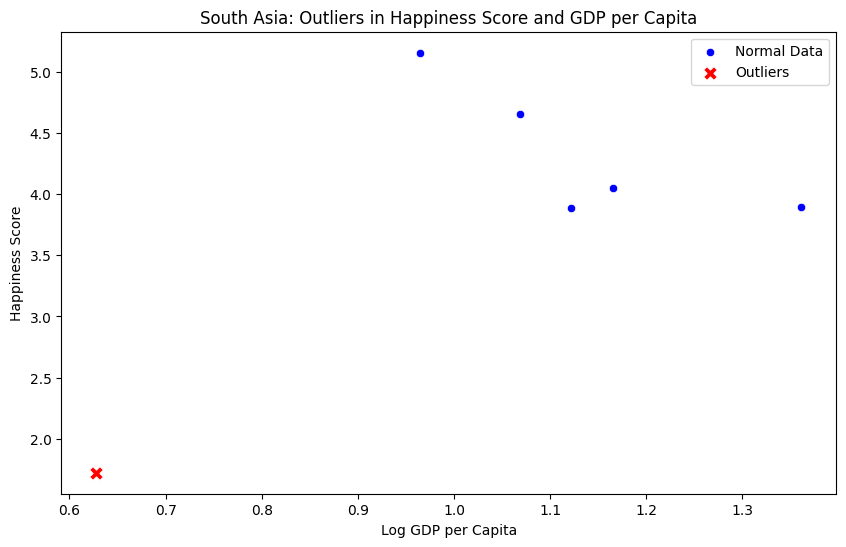

In [108]:
# Define a function to detect outliers using the 1.5 × IQR rule
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 1. Identify outliers in South Asia and Middle East for Score and GDP per Capita
outliers_sa_score = detect_outliers(south_asian_data, 'score')
outliers_sa_gdp = detect_outliers(south_asian_data, 'Log GDP per capita')

outliers_me_score = detect_outliers(middle_country, 'score')
outliers_me_gdp = detect_outliers(middle_country, 'Log GDP per capita')

# Combine all outliers for South Asia and Middle East
outliers_south_asia = pd.concat([outliers_sa_score, outliers_sa_gdp]).drop_duplicates()
outliers_middle_east = pd.concat([outliers_me_score, outliers_me_gdp]).drop_duplicates()

# 2. Plot the outliers for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, label='Normal Data', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia, label='Outliers', color='red', marker='X', s=100)
plt.title("South Asia: Outliers in Happiness Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()


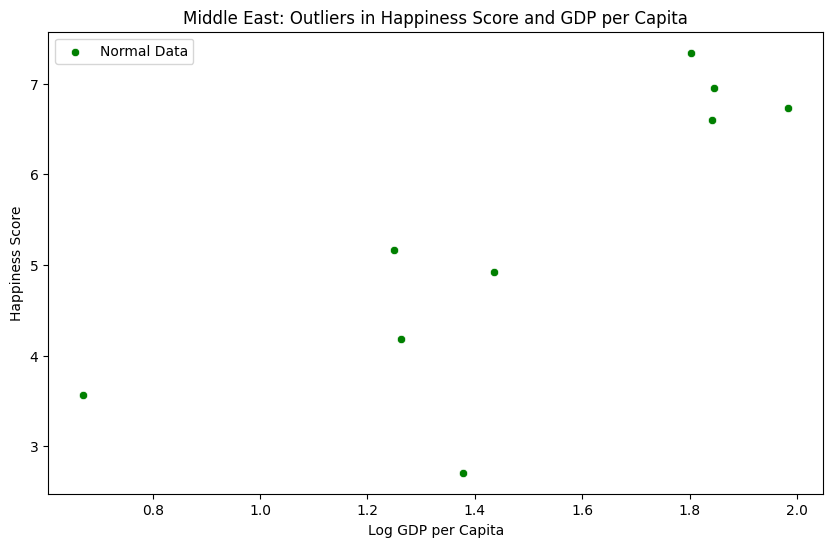

In [109]:
# 3. Plot the outliers for Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_country, label='Normal Data', color='green')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east, label='Outliers', color='red', marker='X', s=100)
plt.title("Middle East: Outliers in Happiness Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

In [110]:
# 4. Print outliers
print("South Asia Outliers:")
print(outliers_south_asia[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers:")
print(outliers_middle_east[['Country name', 'score', 'Log GDP per capita']])

South Asia Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


1.7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

<ipython-input-112-2d1cdecae5cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_country['Region'] = 'Middle East'  # Add a 'Region' column to middle_country


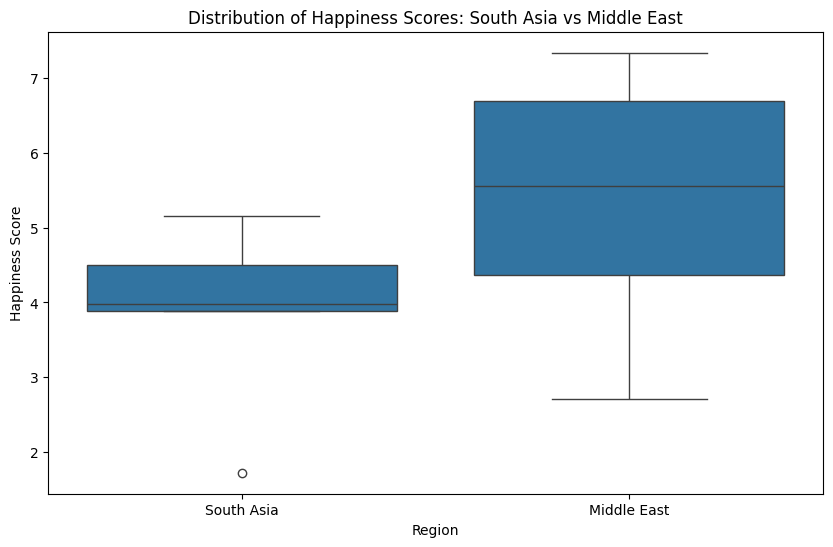

In [112]:
# Filter data for South Asia and Middle East
# Concatenate the South Asia and Middle East DataFrames
filtered_country['Region'] = 'South Asia'  # Add a 'Region' column to filtered_country
middle_country['Region'] = 'Middle East'  # Add a 'Region' column to middle_country
df_filtered = pd.concat([filtered_country, middle_country])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=df_filtered)
plt.title('Distribution of Happiness Scores: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.

Medians:

South Asia: The median happiness score is lower (around 4) compared to the Middle East.
Middle East: The median happiness score is higher (around 5.5 to 6).
Spread (Interquartile Range - IQR):

South Asia: The distribution is more compact, with a narrow interquartile range (IQR). The scores are concentrated around the median, indicating less variation in happiness scores.
Middle East: The distribution is much wider, showing greater variability in happiness scores. The IQR spans a larger range, from around 4 to 7.
Outliers:

South Asia: There is a noticeable outlier below 2, which indicates that one country has an unusually low happiness score compared to the rest of the group.
Middle East: No obvious outliers are present in this region, as the scores appear well within the whiskers.
Range:

South Asia: The overall range of scores is smaller, approximately between 2 and 5.
Middle East: The scores have a larger range, spanning from about 2.7 to 7.5.
Summary:
The Middle East has a higher median happiness score, greater variability, and no clear outliers.
South Asia has a lower median, smaller variability, and includes a significant outlier with a very low score.

• Report Section - For Each Problem:
1. Problem - *: Briefly summarize activity you did in this section followed by:
– Step - by - Step explanations fo tasks performed.
– Well - organized comparative visualizations if any.
– Clear label plots with captions and short description if any.
– Observations, insights or answered to any asked discussion question.
– Interpretations of findings in the broader context of regional happiness.
7


– Discuss any challenges encountered and how they were addressed.
• Conclusion: What to include?
– Provide a concise summary of the findings from each problem.
– Reflect on the significance of the analysis and its implications for understanding global happiness. now combine all and give me the report